In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import spacy
import matplotlib.pyplot as plt
import itertools

In [2]:
nlp = spacy.load('fr_core_news_lg')

In [3]:
def plot_freq(k,dat_val,dat_key,label,filename):

    fig, ax = plt.subplots(1,1,figsize=(25,8))

    ax.bar(x=range(k),height=dat_val[:k],label=label)
    ax.set_xticks(range(k))
    ax.set_xticklabels(dat_key[:k],rotation=90,fontsize=25,horizontalalignment='center')

    ax.set_ylabel('Frequency',fontsize=25)

    ax.tick_params(axis='both', which='major', labelsize=25, length=10, width=2)

    ax.legend(frameon=False,fontsize=25)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

    plt.tight_layout()
    plt.savefig(filename+'.jpeg',dpi=100)
    # plt.show()

In [4]:
df1 = pd.read_csv('tweets_1_tierslieux_19024.csv')
df1 = df1.sort_values(by=['timestamp_utc'], ascending=True,ignore_index=True)

df2 = pd.read_csv('tweets_2_tierslieu_6038.csv')
df2 = df2.sort_values(by=['timestamp_utc'], ascending=True,ignore_index=True)

df_combined = pd.DataFrame(columns=['id','text','hashtags','timestamp_utc','year','month','day'])

for temp_df in [df1,df2]:
    new_df = pd.DataFrame(columns=['id','text','hashtags','timestamp_utc','year','month','day'])
    for cols in ['id','text','hashtags','timestamp_utc']:
        new_df[cols] = temp_df[cols]

    date = pd.to_datetime(temp_df['timestamp_utc'], unit='s')
    new_df['year'] = pd.DatetimeIndex(date).year
    new_df['month'] = pd.DatetimeIndex(date).month
    new_df['day'] = pd.DatetimeIndex(date).day

    df_combined = pd.concat([df_combined,new_df])

df_combined = df_combined.drop_duplicates(ignore_index=True)
df_combined = df_combined.sort_values(by=['timestamp_utc'], ascending=True,ignore_index=True)

ori_hashtag = df_combined['hashtags']

for i, hasht in enumerate(ori_hashtag):
    temp_hasht = hasht.split('|')
    temp_hasht = [ht for ht in temp_hasht if ht!='tierslieux']
    temp_hasht = [ht for ht in temp_hasht if ht!='tierslieu']
    ori_hashtag[i] = temp_hasht

df_combined['hashtags'] = ori_hashtag
df_combined.to_csv('tweets_combined.csv')
df_combined.head()

,id,text,hashtags,timestamp_utc,year,month,day
0,2408979548344320,"RT @fbon: La ""non bibliothèque"" de Chris Meade...",[],1289409320,2010,11,10
1,4884796241088512,"""Impact des nvx modes de travail [= #teletrava...",[teletravail],1289999600,2010,11,17
2,27334783331729408,#thirdplace #tierslieux #EnUnMot RT @hughpearm...,"[enunmot, thirdplace]",1295352094,2011,1,18
3,36102389715058688,observe les amoureux qui s'bécotent sur les ma...,[],1297442455,2011,2,11
4,43616655615594496,#Tierslieu#Aubervilliers http://sebastienlucas...,[tierslieu#aubervilliers],1299233995,2011,3,4


In [5]:
df_tweets = df_combined.copy(deep=True)
df_website = pd.read_csv('commune_mesure_website_data.csv')
years = list(np.unique(df_tweets['year']))
df_website.head()

,Unnamed: 0,Name,Address,Latitude,Longitude,Founding_idea,values carried
0,0,Aquarium,"195 rue Danielle Casanova 93300, 93300 Aubervi...",48.917238,2.396047,"Ouvert à toutes et tous et gratuit daccès, lAq...","Convivialité,Inclusivité,Partage"
1,1,Coco velten,"16 rue Bernard du Bois Marseille, 13001 Marsei...",43.301638,5.376270,Avec comme vocations la lutte contre l’exclusi...,"Accueil,Convivialité,Créativité"
2,2,Ground Control,"81 rue du charolais 75012 Paris, 75012 Paris 1...",48.843742,2.381803,"Créer un lieu culturel hybride indépendant, i...","Convivialité,Créativité,Partage"
3,3,Génération Pasteur,"16 Rue Peyrolière, 81000 Albi, 81000 Albi",43.927847,2.145270,"Pour son projet ""Génération Pasteur"" la Fonciè...","Créativité,Environnement,Inclusivité"
4,4,Impasse du Pétrole - Les Alchimistes,"Impasse du Pétrole, 13015 Marseille 15e Arrond...",43.326003,5.365779,Un centre de léconomie circulaire et de mobili...,NaN


In [6]:
place_name = list(df_website['Name'])


values_df = list(df_website['values carried'])
values_list = []
for vd in values_df:
    if str(vd) != 'nan':
        values_list.append(vd.split(','))

values_list = [item for sublist in values_list for item in sublist]
values_freq = Counter(values_list)
values_freq = sorted(values_freq.items(),key=(lambda i: i[1]))
values_freq


[('Transmission', 2),
 ('Durabilité', 2),
 ('Inclusivité', 7),
 ('Environnement', 7),
 ('Partage', 10),
 ('Accueil', 18),
 ('Créativité', 20),
 ('Coopération', 20),
 ('Convivialité', 22)]

In [7]:
values_name = [v for (v,f) in values_freq]
values_time = [f for (v,f) in values_freq]
# plot_freq(len(values_name),values_time,values_name,'website-values','website_values_most_mentioned')

In [8]:
for pn in place_name:
    df_place = df_tweets.copy(deep=True)
    mask = np.column_stack([df_place['text'].str.contains(str(pn.lower()), na=False)])
    df_place = df_place.loc[mask.any(axis=1)]
    if len(df_place)>0:
        print(str(pn.lower()),len(df_place))


le spot 1
l'assemblée 3
le kaléidoscope 1
lapostroff 1
bordanova 3


In [9]:
values_name_tweet, values_time_tweet = ([] for x in range(2))
values_tweet_year = []
for vf in itertools.combinations(values_freq,1):
    df_value = df_tweets.copy(deep=True)
    mask = np.column_stack([df_value['text'].str.contains((str(vf[0][0].lower())), na=False)])
    df_value = df_value.loc[mask.any(axis=1)]
    values_name_tweet.append((str(vf[0][0].lower())))
    values_time_tweet.append(len(df_value))
    # print(str(vf[0].lower()),len(df_value))

    temp_values_tweet_year = []
    for year in years:
        df_value_year = df_value.copy(deep=True)
        df_value_year = df_value_year[df_value_year['year']==year]
        temp_values_tweet_year.append(len(df_value_year))

    values_tweet_year.append(temp_values_tweet_year)

# sort_idx = np.argsort(values_time_tweet)
# values_time_tweet = list(np.array(values_time_tweet)[sort_idx])
# values_name_tweet = (np.array(values_name_tweet)[sort_idx]).tolist()

# plot_freq(len(values_name_tweet),values_time_tweet,values_name_tweet,'tweet-values','tweet_values_most_mentioned')

In [10]:
print(values_name)
# values_time
print(values_name_tweet)
# print(values_time_tweet

['Transmission', 'Durabilité', 'Inclusivité', 'Environnement', 'Partage', 'Accueil', 'Créativité', 'Coopération', 'Convivialité']
['transmission', 'durabilité', 'inclusivité', 'environnement', 'partage', 'accueil', 'créativité', 'coopération', 'convivialité']


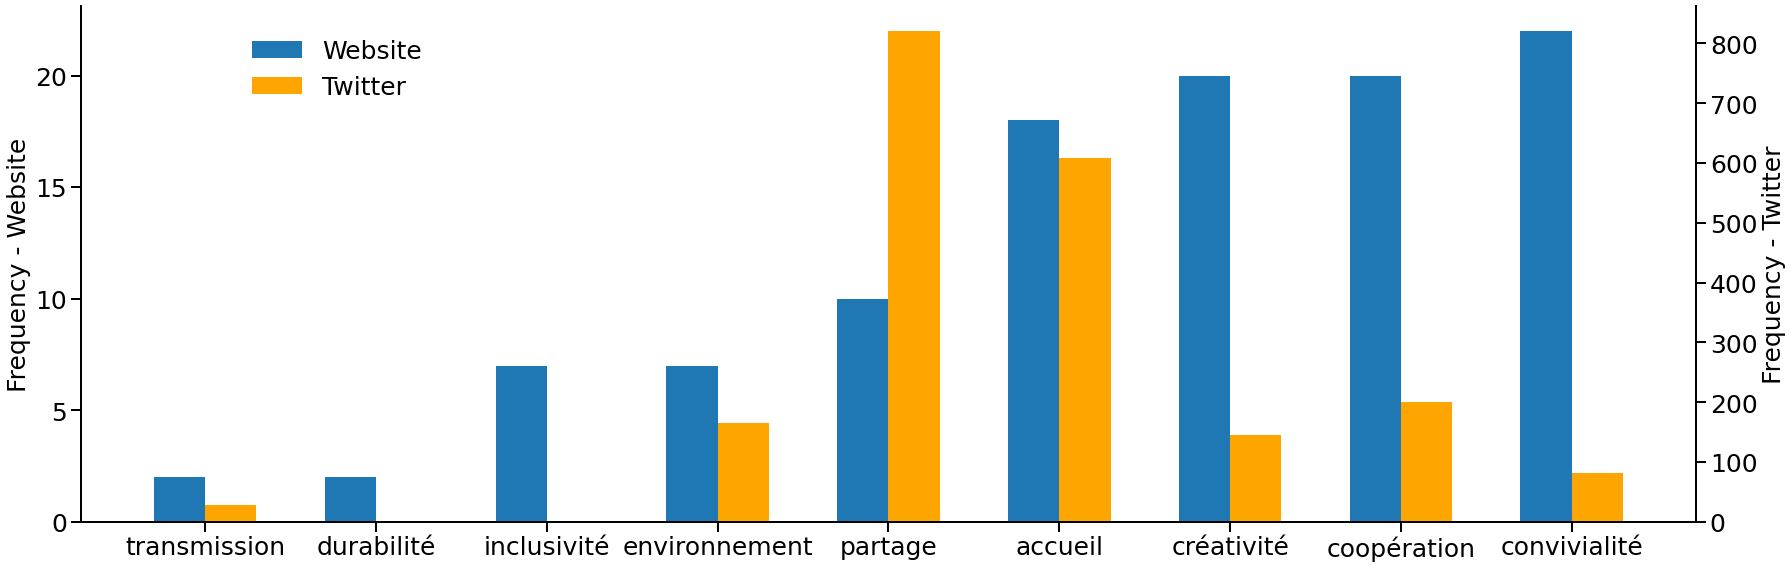

In [18]:
x_marks = np.arange(len(values_name_tweet))


fig, ax = plt.subplots(1,1,figsize=(25,8))

ax2 = ax.twinx()

width = 0.15

ax.bar(x=x_marks-width,width=2*width,height=values_time,label='Website')
ax2.bar(x=x_marks+width,width=2*width,height=values_time_tweet,label='Twitter',color='orange')
ax.set_xticks(x_marks)
ax.set_xticklabels(values_name_tweet,rotation=0,fontsize=25,horizontalalignment='center')

ax.set_ylabel('Frequency - Website',fontsize=25)
ax2.set_ylabel('Frequency - Twitter',fontsize=25)

ax.legend(frameon=False,fontsize=25,loc=(0.1,0.87))
ax2.legend(frameon=False,fontsize=25,loc=(0.1,0.8))

for ax in [ax,ax2]:
    ax.tick_params(axis='both', which='major', labelsize=25, length=10, width=2)

    ax.spines['top'].set_visible(False)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)




plt.tight_layout()
plt.savefig('tweet_vs_website_combined.jpeg',dpi=100)
plt.show()

In [23]:
df_website.head()

,Unnamed: 0,Name,Address,Latitude,Longitude,Founding_idea,values carried
0,0,Aquarium,"195 rue Danielle Casanova 93300, 93300 Aubervi...",48.917238,2.396047,"Ouvert à toutes et tous et gratuit daccès, lAq...","Convivialité,Inclusivité,Partage"
1,1,Coco velten,"16 rue Bernard du Bois Marseille, 13001 Marsei...",43.301638,5.376270,Avec comme vocations la lutte contre l’exclusi...,"Accueil,Convivialité,Créativité"
2,2,Ground Control,"81 rue du charolais 75012 Paris, 75012 Paris 1...",48.843742,2.381803,"Créer un lieu culturel hybride indépendant, i...","Convivialité,Créativité,Partage"
3,3,Génération Pasteur,"16 Rue Peyrolière, 81000 Albi, 81000 Albi",43.927847,2.145270,"Pour son projet ""Génération Pasteur"" la Fonciè...","Créativité,Environnement,Inclusivité"
4,4,Impasse du Pétrole - Les Alchimistes,"Impasse du Pétrole, 13015 Marseille 15e Arrond...",43.326003,5.365779,Un centre de léconomie circulaire et de mobili...,NaN


In [20]:
website_values = list(np.unique(list(df_website['values carried'])))
website_values = [str(wv) for wv in website_values if wv != 'nan']

values_name_website, values_time_website = ([] for x in range(2))
values_name_tweet, values_time_tweet = ([] for x in range(2))

for wv in itertools.combinations(website_values,1):

    ##### Website #############################################
    df_website_value = df_website.copy(deep=True)
    df_website_value['values carried'] = df_website_value['values carried'].str.lower()
    ##### Twitter #############################################
    df_tweet_value = df_tweets.copy(deep=True)
    df_tweet_value['text'] = df_tweet_value['text'].str.lower()

    wv = str(wv).split(',')
    wv = [twv.replace('(','').replace('\'','').replace(')','') for twv in wv if twv!=')']
    num_values = len(wv)

    temp_name = []
    for nv in range(num_values):
        mask_website = np.column_stack([df_website_value['values carried'].str.contains((str(wv[nv].lower())), na=False)])
        df_website_value = df_website_value.loc[mask_website.any(axis=1)]

        mask_twitter = np.column_stack([df_tweet_value['text'].str.contains((str(wv[nv].lower())), na=False)])
        df_tweet_value = df_tweet_value.loc[mask_twitter.any(axis=1)]

        temp_name.append((str(wv[nv].lower())))
    
    values_name_tweet.append(temp_name)
        
    values_time_website.append(len(df_website_value))
    values_time_tweet.append(len(df_tweet_value))

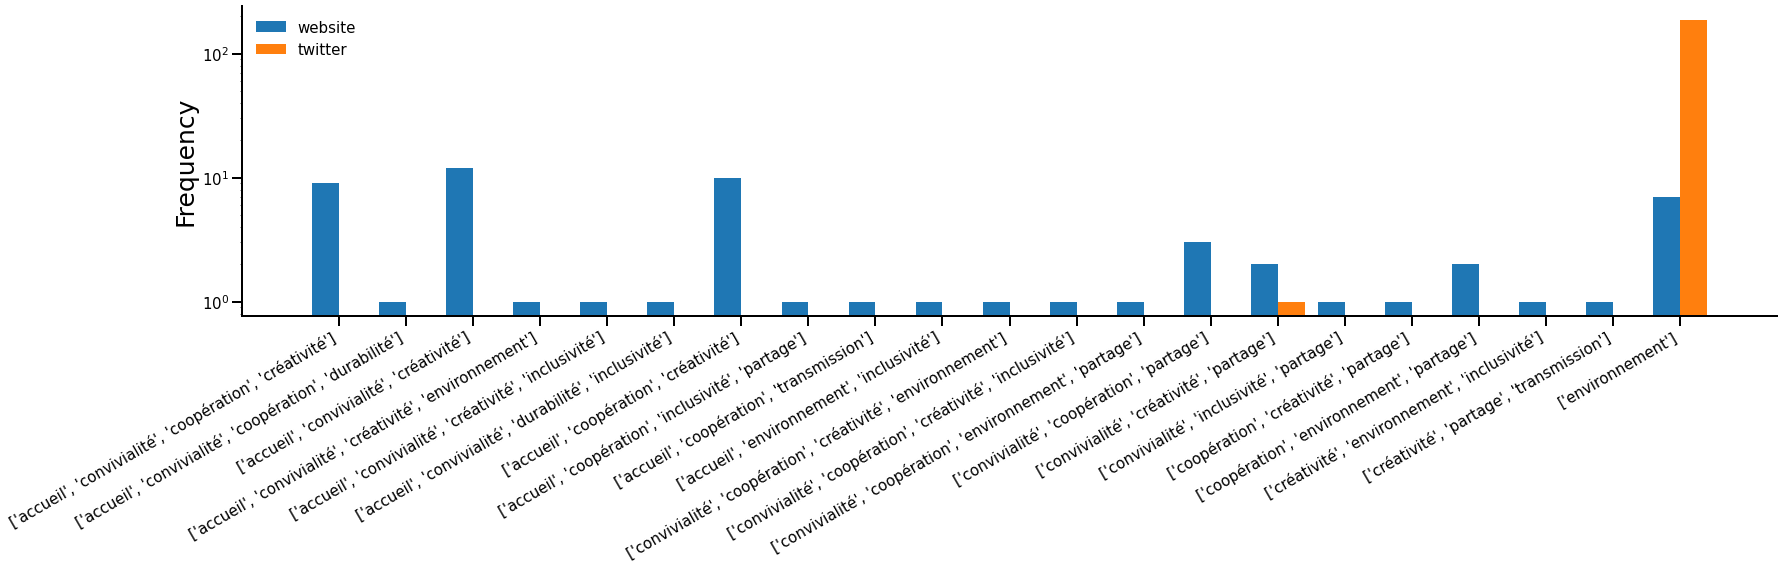

In [23]:
fig, ax = plt.subplots(1,1,figsize=(25,8))
k = len(values_time_tweet)

xmarks = np.arange(k)
width = 0.2

ax.bar(x=xmarks-width,width=2*width,height=values_time_website,label='website')
ax.bar(x=xmarks+width,width=2*width,height=values_time_tweet,label='twitter')
ax.set_xticks(np.arange(k))
ax.set_xticklabels(values_name_tweet,rotation=30,horizontalalignment='right')

ax.set_yscale('log')
ax.set_ylabel('Frequency',fontsize=25)

ax.tick_params(axis='both', which='major', labelsize=15, length=10, width=2)

ax.legend(frameon=False,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.tight_layout()
plt.savefig('website_vs_twitter.jpeg',dpi=100)
plt.show()

In [52]:
website_values = list(np.unique(list(df_website['values carried'])))
website_values = [str(wv) for wv in website_values if wv != 'nan']

values_time_tweet_combination = []
for wv in itertools.combinations(website_values,1):

    ##### Website #############################################
    df_website_value = df_website.copy(deep=True)
    df_website_value['values carried'] = df_website_value['values carried'].str.lower()
    ##### Twitter #############################################
    df_tweet_value = df_tweets.copy(deep=True)
    df_tweet_value['text'] = df_tweet_value['text'].str.lower()

    wv = str(wv).split(',')
    wv = [twv.replace('(','').replace('\'','').replace(')','') for twv in wv if twv!=')']
    num_values = len(wv)

    temp_num = 0
    for nv1,nv2 in itertools.combinations(wv,2):
        df_tweet_value = df_tweets.copy(deep=True)
        mask_twitter = np.column_stack([df_tweet_value['text'].str.contains((str(nv1.lower())), na=False)])
        df_tweet_value = df_tweet_value.loc[mask_twitter.any(axis=1)]
        mask_twitter = np.column_stack([df_tweet_value['text'].str.contains((str(nv2.lower())), na=False)])
        df_tweet_value = df_tweet_value.loc[mask_twitter.any(axis=1)]
        temp_num+=len(df_tweet_value)
        
    values_time_tweet_combination.append(temp_num)

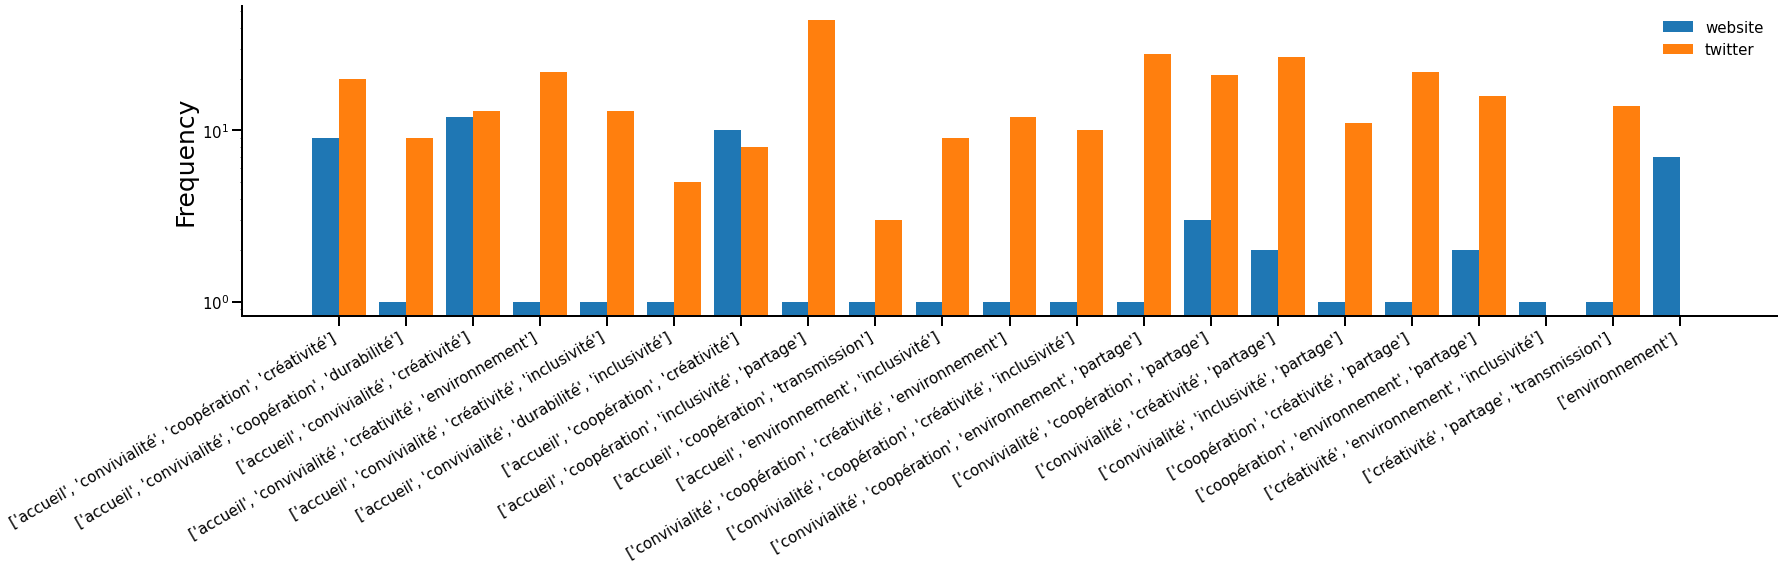

In [53]:
fig, ax = plt.subplots(1,1,figsize=(25,8))
k = len(values_time_tweet)

xmarks = np.arange(k)
width = 0.2

ax.bar(x=xmarks-width,width=2*width,height=values_time_website,label='website')
ax.bar(x=xmarks+width,width=2*width,height=values_time_tweet_combination,label='twitter')
ax.set_xticks(np.arange(k))
ax.set_xticklabels(values_name_tweet,rotation=30,horizontalalignment='right')

ax.set_yscale('log')
ax.set_ylabel('Frequency',fontsize=25)

ax.tick_params(axis='both', which='major', labelsize=15, length=10, width=2)

ax.legend(frameon=False,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.tight_layout()
plt.savefig('website_vs_twitter_any2.jpeg',dpi=100)
plt.show()

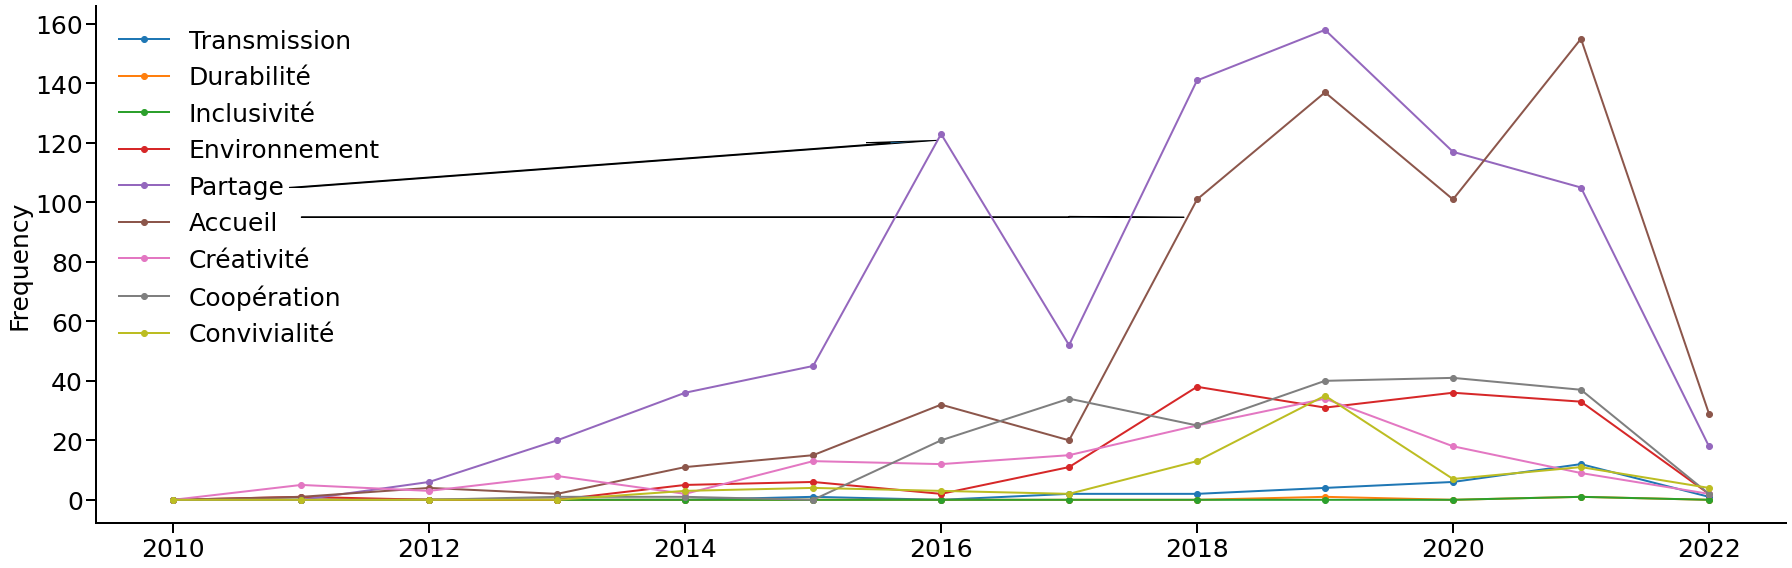

In [49]:
fig, ax = plt.subplots(1,1,figsize=(25,8))

for i,vnt in enumerate(values_name):
    ax.plot(years,values_tweet_year[i],marker='o',linewidth=2,label=vnt)

ax.set_ylabel('Frequency',fontsize=25)

ax.tick_params(axis='both', which='major', labelsize=25, length=10, width=2)

ax.legend(frameon=False,fontsize=25)

ax.arrow(2011,105,4.7,15,shape='right',width=0.2,capstyle='round')
ax.arrow(2011,95,6,0,shape='right',width=0.2,capstyle='round')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.tight_layout()
plt.savefig('tweet_value_year.jpeg',dpi=100)
plt.show()